In [3]:
import torch
import matplotlib.pyplot as plt
import torchvision
from torch import nn

In [4]:
mnist_train = torchvision.datasets.MNIST(root='.', download=True, train=True)
mnist_valid = torchvision.datasets.MNIST(root='.', download=True, train=False)

x_train = mnist_train.data / 255
y_train = mnist_train.targets
x_valid = mnist_valid.data / 255
y_valid = mnist_valid.targets

x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

(torch.Size([60000, 28, 28]),
 torch.Size([10000, 28, 28]),
 torch.Size([60000]),
 torch.Size([10000]))

In [5]:
y_train[:10]

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

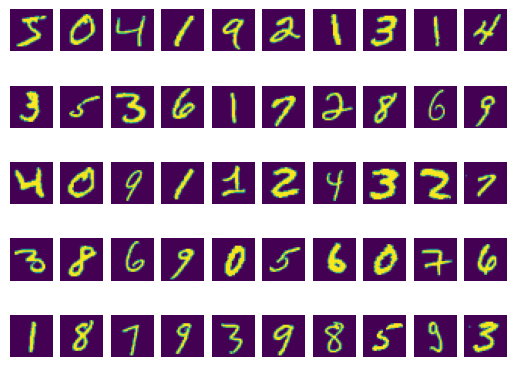

In [6]:
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.axis('off')
    plt.imshow(x_train[i])

In [7]:
y_train_5 = (y_train == 5).float().reshape(-1, 1) # binary cross entropy (N, 1)
y_valid_5 = (y_valid == 5).float().reshape(-1, 1)

dataset_train = list(zip(x_train, y_train_5))
dataset_valid = list(zip(x_valid, y_valid_5))

loader_train = torch.utils.data.DataLoader(dataset_train, batch_size=32, shuffle=True)
loader_valid = torch.utils.data.DataLoader(dataset_valid, batch_size=32)

for x, y in loader_train:
    break

x.shape, y.shape, x.dtype, y.dtype

(torch.Size([32, 28, 28]), torch.Size([32, 1]), torch.float32, torch.float32)

In [8]:
len(dataset_train[0]) # → (tensor([[...]]), 5)
#                            ↑ 이미지        ↑ 정답 숫자

# dataset_train[0][0] → 이미지 텐서 (28×28)
# dataset_train[0][1] → 레이블 (0~9 숫자)

2

In [9]:
x_train.shape, y_train_5.shape
dataset_train[1][1].shape

torch.Size([1])

In [10]:
model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(784, 128), # 28x28 이미지를 펼친 784픽셀
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 1),  # 최종 출력 1개
        nn.Sigmoid()  # 0~1 확률값으로 변환
)

#prob = model(x)
#prob

# prob = 0.92 -> 5일 확률 92%

# optimizer
opt = torch.optim.Adam(model.parameters())

loss_fn = torch.nn.BCELoss()

prob = model(x)
loss = loss_fn(prob, y)
loss.backward()

In [11]:
for epoch in range(20):
    for step, (x, y) in enumerate(loader_train):
        #y = y.float().reshape(-1, 1)  # ✅ 항상 (32, 1)
       
        # 1. feed-forward 
        prob = model(x)
        # 2. loss
        loss = loss_fn(prob, y)
        # 3. grad
        opt.zero_grad()
        loss.backward()
        #4. update
        opt.step()
        
        print(f'\re={epoch} s ={step} l={loss}', end='')
    print()
    
# 60000 / 32(batch_size) = 1875        

e=0 s =1874 l=0.0041340817697346214
e=1 s =1874 l=0.03227211162447929424
e=2 s =1874 l=0.00325700012035667945
e=3 s =1874 l=0.01599319837987423533
e=4 s =1874 l=0.00077847245847806334
e=5 s =1874 l=0.00059036689344793563
e=6 s =1874 l=0.00082184706116095192
e=7 s =1874 l=6.0918755480088294e-05
e=8 s =1874 l=0.00037348584737628745
e=9 s =1874 l=0.00019131353474222124
e=10 s =1874 l=0.00308531732298433885
e=11 s =1874 l=1.0029211807704996e-05
e=12 s =1874 l=1.3977810340293217e-06
e=13 s =1874 l=1.8545638340583537e-06
e=14 s =1874 l=6.731690518790856e-055
e=15 s =1874 l=2.284429683641065e-055
e=16 s =1874 l=0.00023678509751334786
e=17 s =1874 l=1.06554716694518e-0505
e=18 s =1874 l=1.4407847857000888e-06
e=19 s =1874 l=3.7919417081866413e-06


In [12]:
with torch.no_grad():
    prob = model(x_valid) # x_valid.shape = 10000, 28, 28

loss = loss_fn(prob, y_valid_5)
loss

tensor(0.0189)

In [13]:
((prob > 0.5 ) == y_valid_5).float().mean()

tensor(0.9955)

In [20]:
import cv2
image = cv2.imread('5555.png', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (28, 28))
image = 255 - image

image = image[None, :, :]

with torch.no_grad():
    prob = model(torch.tensor(image) / 255)
prob

tensor([[1.]])

In [21]:
pred = torch.zeros((10000, 1))
(pred == y_valid_5).float().mean()

tensor(0.9108)

# 다중 분류

Softmax는 여러 출력값을 확률 분포로 변화함

예를 들어 '3'을 넣으면

tensor([0.02, 0.01, 0.05, 0.85, 0.03, 0.01, 0.01, 0.01, 0.01, 0.01])
          0     1     2     3     4     5     6     7     8     9

3일 확률이 85%로 가장 높음 -> 예측 3

In [32]:
dataset_train = list(zip(x_train, y_train))
dataset_valid = list(zip(x_valid, y_valid))

loader_train = torch.utils.data.DataLoader(dataset_train, batch_size=32, shuffle=True)
loader_valid = torch.utils.data.DataLoader(dataset_valid, batch_size=32)

for x, y in loader_train:
    break

x.shape, y.shape, x.dtype, y.dtype

(torch.Size([32, 28, 28]), torch.Size([32]), torch.float32, torch.int64)

In [34]:
model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(784, 128), # 28x28 이미지를 펼친 784픽셀
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10),  # 0~9 각 숫자일 점수 10개 출력
        nn.Sigmoid()  # 0~1 확률값으로 변환
)

# optimizer
opt = torch.optim.Adam(model.parameters())

loss_fn = torch.nn.CrossEntropyLoss()

prob = model(x)
loss = loss_fn(prob, y)
loss.backward()

In [27]:
a = torch.tensor([-1, 0, 1.])
torch.softmax(a, dim = 0)

# → tensor([0.0900, 0.2447, 0.6652])
#            ↑ 합이 항상 1.0

tensor([0.0900, 0.2447, 0.6652])

In [37]:
for epoch in range(20):
    total_loss = 0
    total_acc = 0
    for step, (x, y) in enumerate(loader_train):
       
        # 1. feed-forward 
        logit = model(x)
        # 2. loss
        loss = loss_fn(logit, y)
        # 3. grad
        opt.zero_grad()
        loss.backward()
        #4. update
        opt.step()
        
        # metrics
        total_loss += loss.item()
        m_loss = total_loss / (step + 1)
        
        pred = logit.argmax(dim = 1)
        acc = (pred == y).float().mean() # acc
        total_acc += acc.item()
        m_acc = total_acc / (step + 1)
        
        print(f'\r e={epoch} s ={step} l={m_loss:.4f} acc = {m_acc:.4f}', end='')
    print()
    
    
    # l : 평균 loss(낮을수록 좋음) , acc : 평균 정확도(높을수록 좋음) 
# 60000 / 32(batch_size) = 1875        

 e=0 s =1874 l=1.4863 acc = 0.9706
 e=1 s =1874 l=1.4820 acc = 0.9757
 e=2 s =1874 l=1.4791 acc = 0.9784
 e=3 s =1874 l=1.4769 acc = 0.9811
 e=4 s =1874 l=1.4752 acc = 0.9828
 e=5 s =1874 l=1.4738 acc = 0.9846
 e=6 s =1874 l=1.4729 acc = 0.9861
 e=7 s =1874 l=1.4715 acc = 0.9880
 e=8 s =1874 l=1.4713 acc = 0.9881
 e=9 s =1874 l=1.4705 acc = 0.9890
 e=10 s =1874 l=1.4701 acc = 0.9894
 e=11 s =1874 l=1.4692 acc = 0.9904
 e=12 s =1874 l=1.4692 acc = 0.9902
 e=13 s =1874 l=1.4687 acc = 0.9916
 e=14 s =1874 l=1.4681 acc = 0.9921
 e=15 s =1874 l=1.4683 acc = 0.9918
 e=16 s =1874 l=1.4679 acc = 0.9926
 e=17 s =1874 l=1.4677 acc = 0.9926
 e=18 s =1874 l=1.4678 acc = 0.9926
 e=19 s =1874 l=1.4674 acc = 0.9928


In [ ]:
with torch.no_grad():
    logit = model(x_valid)

pred = logit.argmax(axis = 1)
(pred == y_valid).float().mean()

tensor(0.9772)

In [50]:
import cv2
image = cv2.imread('5555.png', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (28, 28))
image = 255 - image


image = image[None, :, :] # (1, 28, 28)

with torch.no_grad():
    logit = model(torch.tensor(image).float() / 255)
    
pred = logit.argmax(dim = 1) 
print(pred)


tensor([5])
